# 데이터 파악

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score , mean_absolute_error, mean_squared_error, r2_score

import bisect
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [3]:
train.head()

,순번,대지위치,대지구분코드,관리건축물대장PK,새주소지상지하코드,층구분코드,층구분코드명,층번호,층번호명,구조코드명,...,월평균강우량(2021년 7월),월평균강우량(2021년 8월),월평균강우량(2021년 9월),월평균강우량(2022년 7월),월평균강우량(2022년 8월),월평균강우량(2022년 9월),월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),침수여부
0,1,서울특별시 금천구 가산동 139-10번지,0,11545-8362,0.0,20.0,지상,1,1층,벽돌구조,...,3.903226,6.322581,3.666667,7.290323,22.193548,7.1,17.193548,9.451613,3.733333,NaN
1,2,서울특별시 금천구 가산동 139-10번지,0,11545-8362,0.0,20.0,지상,1,1층,경량철골구조,...,3.903226,6.322581,3.666667,7.290323,22.193548,7.1,17.193548,9.451613,3.733333,NaN
2,3,서울특별시 금천구 가산동 139-10번지,0,11545-8362,0.0,20.0,지상,2,2층,벽돌구조,...,3.903226,6.322581,3.666667,7.290323,22.193548,7.1,17.193548,9.451613,3.733333,NaN
3,4,서울특별시 금천구 가산동 139-11번지,0,11545-8016,0.0,20.0,지상,2,2층,철근콘크리트구조,...,3.903226,6.322581,3.666667,7.290323,22.193548,7.1,17.193548,9.451613,3.733333,NaN
4,5,서울특별시 금천구 가산동 139-11번지,0,11545-8016,0.0,10.0,지하,1,지1층,철근콘크리트구조,...,3.903226,6.322581,3.666667,7.290323,22.193548,7.1,17.193548,9.451613,3.733333,NaN


In [4]:
test.head()

,순번,대지위치,대지구분코드,건물명,구조코드,구조코드명,주용도코드,주용도코드명,층번호,층면적(㎡),...,최대강우량(2022년 7월),최대강우량(2022년 8월),최대강우량(2022년 9월),최대강우량(2023년 7월),최대강우량(2023년 8월),최대강우량(2023년 9월),연평균강우량(2021년),연평균강우량(2022년),연평균강우량(2023년),침수여부
0,1,서울특별시 노원구 노원구 126번지,0.0,서울여대 과학관 등,21.0,철근콘크리트구조,Z8000,교육연구및복지시설,4.0,1086.50,...,120,123,121,89,75,33,4.1,9.8,9.2,NaN
1,2,서울특별시 노원구 노원구 126번지,0.0,서울여대 과학관 등,21.0,철근콘크리트구조,Z8000,교육연구및복지시설,1.0,2335.93,...,120,123,121,89,75,33,4.1,9.8,9.2,NaN
2,3,서울특별시 노원구 노원구 126번지,0.0,서울여대 과학관 등,41.0,철골콘크리트구조,Z8000,교육연구및복지시설,9.0,1209.55,...,120,123,121,89,75,33,4.1,9.8,9.2,NaN
3,4,서울특별시 노원구 노원구 126번지,0.0,서울여대 과학관 등,21.0,철근콘크리트구조,Z8000,교육연구및복지시설,1.0,1343.11,...,120,123,121,89,75,33,4.1,9.8,9.2,NaN
4,5,서울특별시 노원구 노원구 126번지,0.0,서울여대 과학관 등,21.0,철근콘크리트구조,Z8000,교육연구및복지시설,2.0,1087.76,...,120,123,121,89,75,33,4.1,9.8,9.2,NaN


In [5]:
# train과 test 컬럼명 일치 - train 기준
train.rename(columns={'층면적(㎡)': '면적(㎡)' , '연평균강우량(2021년)' : '2021년 연평균강우량', 
                     '연평균강우량(2022년)' : '2022년 연평균강우량',
                    '연평균강우량(2023년)':'2023년 연평균강우량'}, inplace=True)

# test과 train 컬럼명 일치 - test 기준
test.rename(columns={'층면적(㎡)': '면적(㎡)' , '연평균강우량(2021년)' : '2021년 연평균강우량', 
                     '연평균강우량(2022년)' : '2022년 연평균강우량',
                    '연평균강우량(2023년)':'2023년 연평균강우량'}, inplace=True)

In [6]:
train.columns[:16]

Index(['순번', '대지위치', '대지구분코드', '관리건축물대장PK', '새주소지상지하코드', '층구분코드', '층구분코드명',
       '층번호', '층번호명', '구조코드명', '기타구조', '주용도코드명', '기타용도', '면적(㎡)', '주부속구분코드명',
       '생성일자'],
      dtype='object')

In [7]:
test.columns[:14]

Index(['순번', '대지위치', '대지구분코드', '건물명', '구조코드', '구조코드명', '주용도코드', '주용도코드명',
       '층번호', '면적(㎡)', '층구분코드', '층구분코드명', '생성일자', '월평균강우량(2021년 7월)'],
      dtype='object')

In [8]:
def align_columns(train, test):
    
    # train, test 각 컬럼 비교 
    columns_to_drop = [column for column in train.columns[:16] if column not in test.columns[:14]]

    # Drop these columns from train_df
    train = train.drop(columns=columns_to_drop , inplace = True)

    return train

align_columns(train, test)

In [9]:
train.columns

Index(['순번', '대지위치', '대지구분코드', '층구분코드', '층구분코드명', '층번호', '구조코드명', '주용도코드명',
       '면적(㎡)', '생성일자', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '침수여부'],
      dtype='object')

In [10]:
test.columns

Index(['순번', '대지위치', '대지구분코드', '건물명', '구조코드', '구조코드명', '주용도코드', '주용도코드명',
       '층번호', '면적(㎡)', '층구분코드', '층구분코드명', '생성일자', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '최대강우량(2021년 7월)',
       '최대강우량(2021년 8월)', '최대강우량(2021년 9월)', '최대강우량(2022년 7월)',
       '최대강우량(2022년 8월)', '최대강우량(2022년 9월)', '최대강우량(2023년 7월)',
       '최대강우량(2023년 8월)', '최대강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량',
       '2023년 연평균강우량', '침수여부'],
      dtype='object')

In [11]:
# 가정: df는 데이터프레임이며 위의 세 컬럼을 포함하고 있음
columns_to_consider_2021 = ['최대강우량(2021년 7월)', '최대강우량(2021년 8월)', '최대강우량(2021년 9월)']
columns_to_consider_2022 = ['최대강우량(2022년 7월)', '최대강우량(2022년 8월)', '최대강우량(2022년 9월)']
columns_to_consider_2023 = ['최대강우량(2023년 7월)', '최대강우량(2023년 8월)', '최대강우량(2023년 9월)']

# 각 행별로 가장 높은 강우량을 가진 컬럼의 값을 찾음
test['2021년 연최대강우량'] = test[columns_to_consider_2021].max(axis=1)
test['2022년 연최대강우량'] = test[columns_to_consider_2022].max(axis=1)
test['2023년 연최대강우량'] = test[columns_to_consider_2023].max(axis=1)

# 선택적: 원래 컬럼을 제거할 수 있음
test.drop(columns=columns_to_consider_2021, inplace=True)
test.drop(columns=columns_to_consider_2022, inplace=True)
test.drop(columns=columns_to_consider_2023, inplace=True)

In [12]:
train.columns

Index(['순번', '대지위치', '대지구분코드', '층구분코드', '층구분코드명', '층번호', '구조코드명', '주용도코드명',
       '면적(㎡)', '생성일자', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '침수여부'],
      dtype='object')

In [13]:
test.columns # drop 건물명, 구조코드, 주용도 코드 

Index(['순번', '대지위치', '대지구분코드', '건물명', '구조코드', '구조코드명', '주용도코드', '주용도코드명',
       '층번호', '면적(㎡)', '층구분코드', '층구분코드명', '생성일자', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량',
       '2023년 연평균강우량', '침수여부', '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량'],
      dtype='object')

In [14]:
train.columns

Index(['순번', '대지위치', '대지구분코드', '층구분코드', '층구분코드명', '층번호', '구조코드명', '주용도코드명',
       '면적(㎡)', '생성일자', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '침수여부'],
      dtype='object')

In [15]:
test.columns

Index(['순번', '대지위치', '대지구분코드', '건물명', '구조코드', '구조코드명', '주용도코드', '주용도코드명',
       '층번호', '면적(㎡)', '층구분코드', '층구분코드명', '생성일자', '월평균강우량(2021년 7월)',
       '월평균강우량(2021년 8월)', '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)',
       '월평균강우량(2022년 8월)', '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
       '월평균강우량(2023년 8월)', '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량',
       '2023년 연평균강우량', '침수여부', '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량'],
      dtype='object')

In [16]:
test.drop(columns=['건물명', '구조코드', '주용도코드'], inplace=True)

In [95]:
def align_and_reorder_columns(train, test):
    
    # Align columns: Keep only those in both train and test
    common_columns = train.columns.intersection(test.columns)
    train = train[common_columns]

    # Reorder columns in train to match the order in test
    train = train[test.columns]

    return train

align_and_reorder_columns(train, test)

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도,침수여부
0,1,0,0,0,0,1,92.86,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,1
1,2,0,0,0,0,1,81.42,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,1
2,3,0,0,0,0,2,92.86,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,0
3,4,0,0,0,0,2,108.43,20.0,0,20171025,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,0
4,5,0,0,0,0,1,89.98,10.0,0,20171025,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145701,911,0,0,0,0,2,89.26,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,0
145702,912,0,0,0,0,1,59.21,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,1
145703,913,0,0,0,0,1,30.05,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,1
145704,914,0,0,0,0,1,4.30,10.0,0,20171121,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,1


In [96]:
train.columns

Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '침수여부', '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도'],
      dtype='object')

In [97]:
test.columns

Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도', '침수여부'],
      dtype='object')

In [98]:
# 컬럼 일치 여부 확인  
def reorder_train_columns_to_match_test(train, test):
    
    # test 데이터의 컬럼 추출
    test_column_order = test.columns.tolist()

    # '침수여부'가 train_df에는 있지만 test_df에는 없는 경우 목록 끝에 추가합니다
    if '침수여부' in train.columns and '침수여부' not in test_column_order:
        test_column_order.append('침수여부')

    # test와 일치하도록 train 열 순서 바꾸기
    train = train[test_column_order]

    return train

train = reorder_train_columns_to_match_test(train, test)

In [106]:
print(train.columns)
print(test.columns)

Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도', '침수여부'],
      dtype='object')
Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도', '침수여부'],
      dtype='object')


In [100]:
# object type 라벨인코딩

print(train.info())
print(test.info())

# Categorical 컬럼 인코딩
categorical_features = ['대지위치', '구조코드명', '주용도코드명','층구분코드명']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    train[feature] = train[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    train[feature] = le.transform(train[feature].astype(str))
    encoders[feature] = le
    
    
for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    test[feature] = le.fit_transform(test[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145706 entries, 0 to 145705
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   순번                145706 non-null  int64  
 1   대지위치              145706 non-null  int32  
 2   대지구분코드            145706 non-null  int64  
 3   구조코드명             145706 non-null  int32  
 4   주용도코드명            145706 non-null  int32  
 5   층번호               145706 non-null  int64  
 6   면적(㎡)             145706 non-null  float64
 7   층구분코드             145706 non-null  float64
 8   층구분코드명            145706 non-null  int32  
 9   생성일자              145706 non-null  int64  
 10  월평균강우량(2021년 7월)  145706 non-null  float64
 11  월평균강우량(2021년 8월)  145706 non-null  float64
 12  월평균강우량(2021년 9월)  145706 non-null  float64
 13  월평균강우량(2022년 7월)  145706 non-null  float64
 14  월평균강우량(2022년 8월)  145706 non-null  float64
 15  월평균강우량(2022년 9월)  145706 non-null  float64
 16  월평균강우량(2023년 7월)  14

Encoding features:   0%|                                                                         | 0/4 [00:00<?, ?it/s]C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a 

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Encoding features: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.39it/s]


In [101]:
print(train)
print(test)

         순번  대지위치  대지구분코드  구조코드명  주용도코드명  층번호   면적(㎡)  층구분코드  층구분코드명  \
0         1     0       0      0       0    1   92.86   20.0       0   
1         2     0       0      0       0    1   81.42   20.0       0   
2         3     0       0      0       0    2   92.86   20.0       0   
3         4     0       0      0       0    2  108.43   20.0       0   
4         5     0       0      0       0    1   89.98   10.0       0   
...     ...   ...     ...    ...     ...  ...     ...    ...     ...   
145701  911     0       0      0       0    2   89.26   20.0       0   
145702  912     0       0      0       0    1   59.21   20.0       0   
145703  913     0       0      0       0    1   30.05   20.0       0   
145704  914     0       0      0       0    1    4.30   10.0       0   
145705  915     0       0      0       0    1   94.55   20.0       0   

            생성일자  ...  월평균강우량(2023년 8월)  월평균강우량(2023년 9월)  2021년 연평균강우량  \
0       20181204  ...          9.451613          3.733333   

# 데이터 전처리

- 침수 여부 처리를 어떤 근거로 0 : 침수 가능성 낮음 , 1: 침수 가능성 있음 으로 정하였나?
- 참고문헌을 근거하여 72mm 이상 침수로 판단하여야 하지만, 연 최대 강수량을 보았을 때 최대 강수량이 72mm을 모두 넘음!! 
- 저희 god 팀은 저희만의 기준으로 침수 라벨링을 진행하기로 함 
- 면적이 120m^2 이하, 층번호가 1, 평균 강우량 22mm 초과는 침수 가능성이 있다라고 판단하였다. 

In [24]:
train

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,침수여부,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량
0,1,0,0,0,0,1,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
1,2,0,0,0,0,1,81.42,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
2,3,0,0,0,0,2,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
3,4,0,0,0,0,2,108.43,20.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
4,5,0,0,0,0,1,89.98,10.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145701,911,0,0,0,0,2,89.26,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
145702,912,0,0,0,0,1,59.21,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
145703,913,0,0,0,0,1,30.05,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333
145704,914,0,0,0,0,1,4.30,10.0,0,20171121,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,NaN,67.666667,199,79.333333


In [25]:
test

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,침수여부,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량
0,1,1,0.0,0,0,4.0,1086.50,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
1,2,1,0.0,0,0,1.0,2335.93,10.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
2,3,1,0.0,0,0,9.0,1209.55,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
3,4,1,0.0,0,0,1.0,1343.11,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
4,5,1,0.0,0,0,2.0,1087.76,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,1,1.0,0,0,1.0,18.00,20.0,0,20200220,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
34913,34914,1,1.0,0,0,1.0,18.00,20.0,0,20200220,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
34914,34915,1,0.0,0,0,2.0,110.36,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89
34915,34916,1,0.0,0,0,3.0,115.16,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,NaN,66,123,89


In [26]:
# 침수모델여부 라벨링 

def label_flooding(train):
    # 월평균강우량으로 임계값 정의 
    rainfall_cols = [f'월평균강우량({year}년 {month}월)' for year in range(2021, 2024) for month in [7, 8, 9]]

    # 상태 정의
    condition = (
        (train['층번호'] == 1) & 
        (train['면적(㎡)'] <= 120) & 
        (train[rainfall_cols] > 22).any(axis=1)
    )

    # 라벨링 정의
    train['침수여부'] = condition.astype(int)

    return train

label_flooding(train)

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,침수여부,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량
0,1,0,0,0,0,1,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333
1,2,0,0,0,0,1,81.42,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333
2,3,0,0,0,0,2,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,0,67.666667,199,79.333333
3,4,0,0,0,0,2,108.43,20.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,0,67.666667,199,79.333333
4,5,0,0,0,0,1,89.98,10.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145701,911,0,0,0,0,2,89.26,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,0,67.666667,199,79.333333
145702,912,0,0,0,0,1,59.21,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333
145703,913,0,0,0,0,1,30.05,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333
145704,914,0,0,0,0,1,4.30,10.0,0,20171121,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,1,67.666667,199,79.333333


In [102]:
# '침수여부' 컬럼의 0과 1의 갯수를 파악
flooding_counts = train['침수여부'].value_counts()
flooding_counts

침수여부
0    85523
1    60183
Name: count, dtype: int64

In [103]:
# 매개 변수로 저장할 파일 이름을 전달합니다.
train.to_excel('train_eda.xlsx')
test.to_excel('test_eda.xlsx')

### 결측치 처리

In [29]:
train.isna().sum()

순번                  0
대지위치                0
대지구분코드              0
구조코드명               0
주용도코드명              0
층번호                 0
면적(㎡)               0
층구분코드               2
층구분코드명              0
생성일자                0
월평균강우량(2021년 7월)    0
월평균강우량(2021년 8월)    0
월평균강우량(2021년 9월)    0
월평균강우량(2022년 7월)    0
월평균강우량(2022년 8월)    0
월평균강우량(2022년 9월)    0
월평균강우량(2023년 7월)    0
월평균강우량(2023년 8월)    0
월평균강우량(2023년 9월)    0
2021년 연평균강우량        0
2022년 연평균강우량        0
2023년 연평균강우량        0
침수여부                0
2021년 연최대강우량        0
2022년 연최대강우량        0
2023년 연최대강우량        0
dtype: int64

In [104]:
test

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도,침수여부
0,1,0,0.0,0,0,4.0,1086.50,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
1,2,0,0.0,0,0,1.0,2335.93,10.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
2,3,0,0.0,0,0,9.0,1209.55,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
3,4,0,0.0,0,0,1.0,1343.11,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
4,5,0,0.0,0,0,2.0,1087.76,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,0,1.0,0,0,1.0,18.00,20.0,0,20200220,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2020,0
34913,34914,0,1.0,0,0,1.0,18.00,20.0,0,20200220,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2020,0
34914,34915,0,0.0,0,0,2.0,110.36,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
34915,34916,0,0.0,0,0,3.0,115.16,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0


In [31]:
# train data 층구분코드는 최빈값으로 대체
# '층구분코드' 컬럼의 최빈값 계산
mode_value = train['층구분코드'].mode()[0]

# 결측치를 최빈값으로 채우기
train['층구분코드'].fillna(mode_value, inplace=True)

In [32]:
# test 데이터 대지구분코드, 층번호, 층구분코드 최빈값으로 대체
# '대지구분코드' 컬럼의 최빈값 계산
mode_value = test['대지구분코드'].mode()[0]
# 결측치를 최빈값으로 채우기
test['대지구분코드'].fillna(mode_value, inplace=True)

mode_value2 = test['층번호'].mode()[0]
# 결측치를 최빈값으로 채우기
test['층번호'].fillna(mode_value2, inplace=True)

mode_value3 = test['층구분코드'].mode()[0]
# 결측치를 최빈값으로 채우기
test['층구분코드'].fillna(mode_value3, inplace=True)

# 데이터 EDA(Exploratory Data Analysis)

- 탐색적 데이터 분석 
- matplotlib 및 seaborn 라이브러리를 통해 시각화

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
plt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\aosdb\AppData\Local\Temp\ipykernel_2628\588120413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['면적(㎡)'], kde=True, fit=stats.norm)
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('m

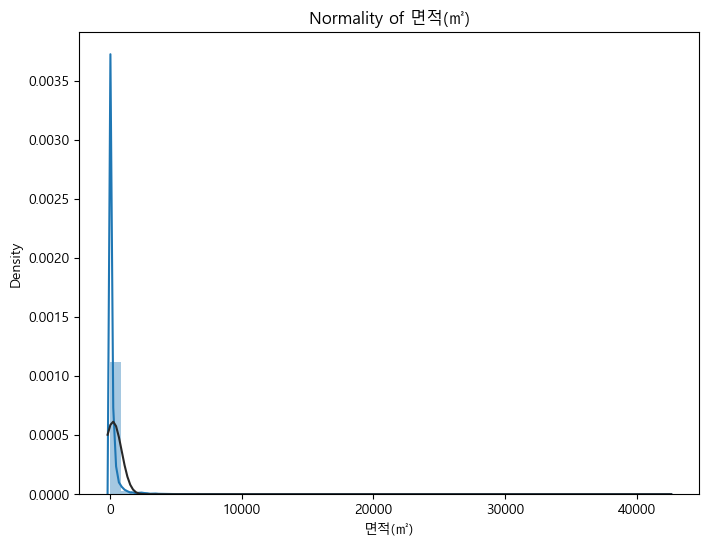

In [34]:
# 각 컬럼의 분포 확인 - 면적
plt.figure(figsize=(8, 6))
sns.distplot(train['면적(㎡)'], kde=True, fit=stats.norm)
plt.title(f'Normality of 면적(㎡)')
plt.show()

C:\Users\aosdb\AppData\Local\Temp\ipykernel_2628\3488508176.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['층번호'], kde=True, fit=stats.norm)
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

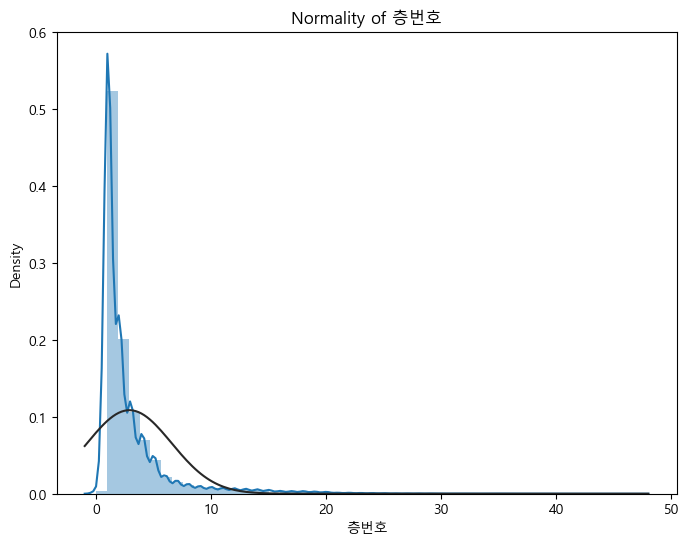

In [35]:
# 각 컬럼의 분포 확인 
plt.figure(figsize=(8, 6))
sns.distplot(train['층번호'], kde=True, fit=stats.norm)
plt.title(f'Normality of 층번호')
plt.show()

C:\Users\aosdb\AppData\Local\Temp\ipykernel_2628\1086227217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['층구분코드'], kde=True, fit=stats.norm)
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

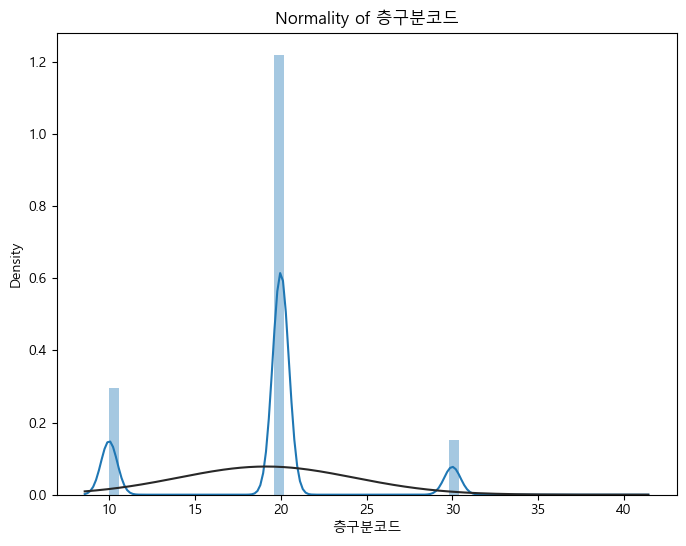

In [36]:
# 각 컬럼의 분포 확인 
plt.figure(figsize=(8, 6))
sns.distplot(train['층구분코드'], kde=True, fit=stats.norm)
plt.title(f'Normality of 층구분코드')
plt.show()

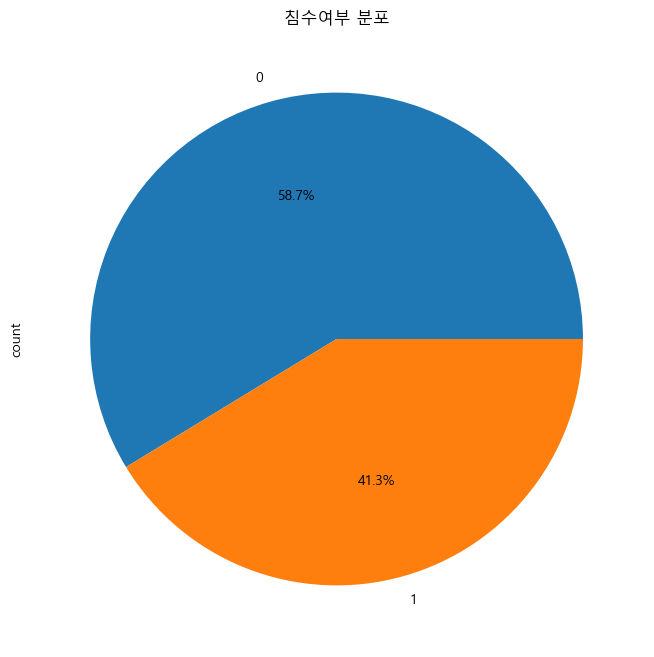

In [37]:
# '침수여부' 컬럼의 값 분포 파이차트
train['침수여부'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('침수여부 분포')
plt.show()

C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\aosdb\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


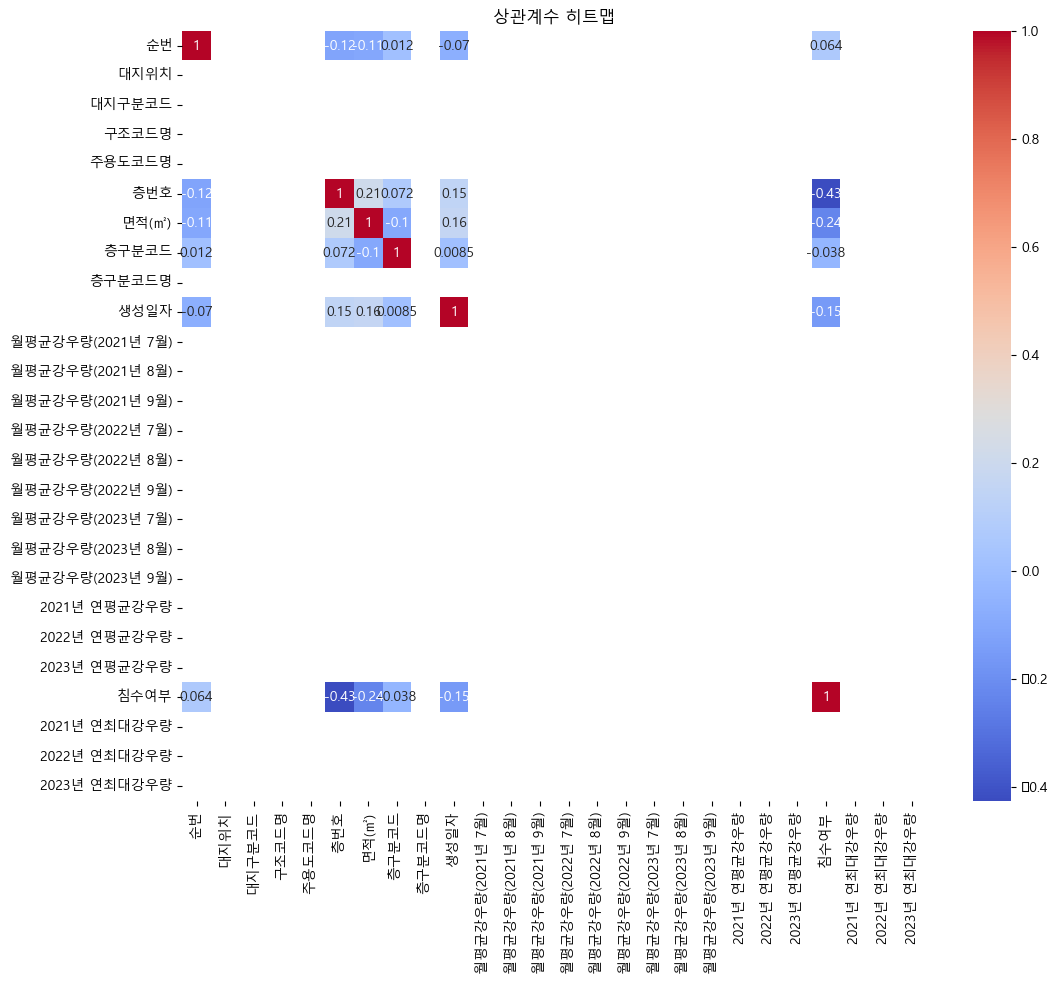

In [38]:
# 상관계수 계산
correlation = train.corr()

# 상관계수 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('상관계수 히트맵')
plt.show()

C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

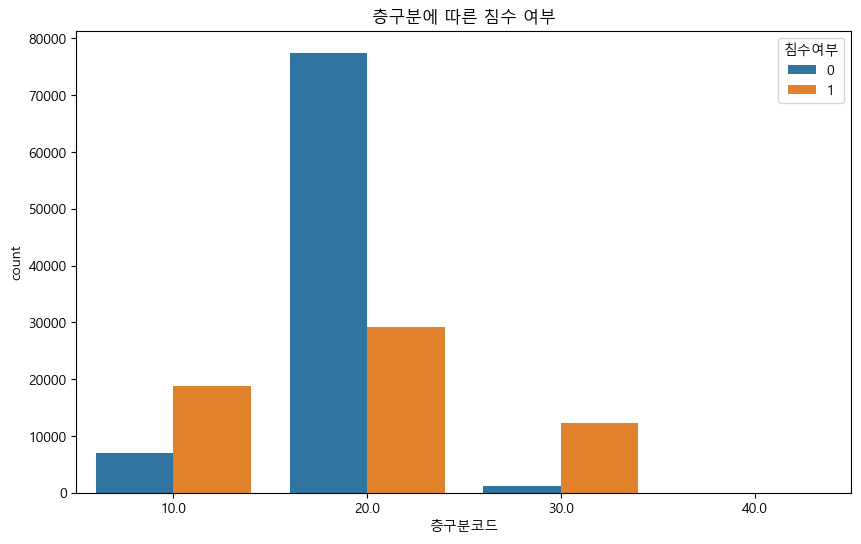

In [39]:
# 층구분에 따른 침수 여부 히스토그램
plt.figure(figsize=(10, 6))
sns.countplot(x='층구분코드', hue='침수여부', data=train)
plt.title('층구분에 따른 침수 여부')
plt.show()

C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


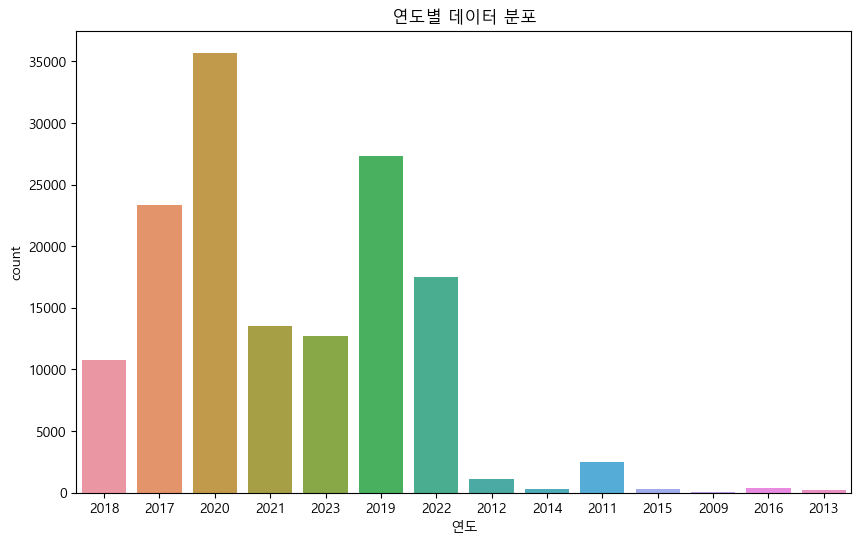

In [41]:
# 생성일자에 따른 침수 여부 히스토그램
# '생성일자'에서 연도만 추출
train['연도'] = train['생성일자'].astype(str).str[:4]
# test 데이터도'연도' 컬럼 추가
test['연도'] = test['생성일자'].astype(str).str[:4]

# 연도별 히스토그램
plt.figure(figsize=(10, 6))
sns.countplot(x='연도', data=train)
plt.title('연도별 데이터 분포')
plt.show()

C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aosdb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

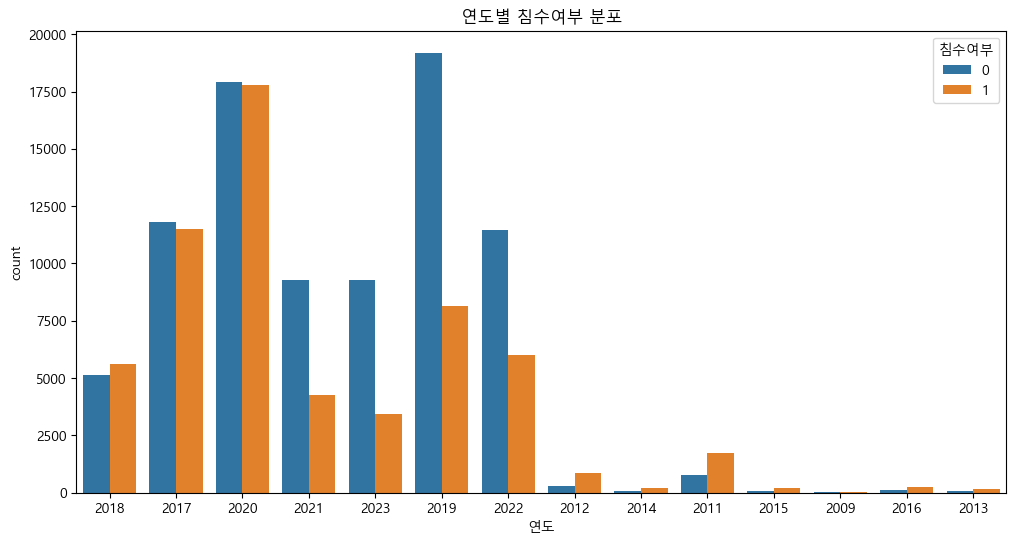

In [42]:
# 연도별 및 침수여부별 히스토그램
plt.figure(figsize=(12, 6))
sns.countplot(x='연도', hue='침수여부', data=train)
plt.title('연도별 침수여부 분포')
plt.show()

- 생성일자(년도)와는 침수 여부 모델이 크지 않다는 것을 보인다
- 이는 물론 2017년도 이전에 데이터가 적은 점도 무시할 수 없다

In [43]:
# 로지스틱 회귀 모델 구축
model = sm.Logit(train['침수여부'], sm.add_constant(train['면적(㎡)']))
result = model.fit()

# 결과 출력
print(result.summary())

C:\Users\aosdb\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.383991
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   침수여부   No. Observations:               145706
Model:                          Logit   Df Residuals:                   145704
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.4336
Time:                        00:07:57   Log-Likelihood:                -55950.
converged:                       True   LL-Null:                       -98781.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7893      0.017    161.235      0.000       2.755       2.823
면적(㎡)         -0.0373      0

C:\Users\aosdb\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


#### 모델 요약:

- Dep. Variable (종속 변수): 침수여부
- No. Observations (관측치 수): 145,706
- Df Residuals (잔차 자유도): 145,704
- Df Model (모델 자유도): 1
- Method (방법): MLE (최대우도추정법)
- Log-Likelihood (로그우도): -55950
- LL-Null (null 모델의 로그우도): -98781
- LLR p-value (우도비 검정의 p값): 0.000
- Pseudo R-squ (가성 결정계수): 0.4336

#### 계수 해석:

- const (절편): 2.7893 (표준 오차: 0.017)
- 면적(㎡) (계수): -0.0373 (표준 오차: 0.000)

#### 결과 해석:

- 절편 (const): 면적이 0인 경우 침수될 로그 오즈(log odds).
- 면적(㎡): 면적이 1㎡ 증가할 때마다 침수될 로그 오즈가 -0.0373만큼 감소한다는 것을 의미합니다. 이는 면적이 증가함에 따라 침수될 확률이 감소한다는 것을 나타냅니다.
- P>|z| 값: 면적의 p-value는 0.000으로, 통계적으로 유의미하다고 할 수 있습니다. 이는 면적이 침수여부에 유의한 영향을 미친다는 것을 나타냅니다.
- Pseudo R-squared: 모델의 설명력을 나타내는 가성 결정계수는 0.4336으로, 모델이 데이터의 변동성 중 상당 부분을 설명한다고 볼 수 있습니다.

#### 주의 사항:

완전 분리(Quasi-separation) 경고: "Possibly complete quasi-separation"이라는 경고는 일부 데이터가 완벽하게 예측될 수 있음을 나타냅니다. 이는 데이터에 완전 분리 현상이 있을 수 있으며, 이로 인해 모델의 일부 계수 추정이 불안정할 수 있음을 의미합니다.

In [44]:
# 로지스틱 회귀 모델 구축
model = sm.Logit(train['침수여부'], sm.add_constant(train['층번호']))
result = model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.243781
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   침수여부   No. Observations:               145706
Model:                          Logit   Df Residuals:                   145704
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.6404
Time:                        00:07:58   Log-Likelihood:                -35520.
converged:                       True   LL-Null:                       -98781.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1690      0.050    142.700      0.000       7.071       7.267
층번호           -5.6103      0

#### 모델 요약:

- 종속 변수(Dep. Variable): 침수여부
- 관측치 수(No. Observations): 145,706
- 잔차 자유도(Df Residuals): 145,704
- 모델 자유도(Df Model): 1
- 방법(Method): MLE (최대우도추정법)
- 로그우도(Log-Likelihood): -35,520
- null 모델의 로그우도(LL-Null): -98,781
- 우도비 검정의 p값(LLR p-value): 0.000
- 가성 결정계수(Pseudo R-squ): 0.6404

#### 계수 해석:

- 절편(const): 7.1690 (표준 오차: 0.050)
- 층번호(계수): -5.6103 (표준 오차: 0.047)

#### 결과 해석:

- 절편(const): 층번호가 0인 경우의 침수될 로그 오즈(log odds).
- 층번호: 층번호가 1 증가할 때마다 침수될 로그 오즈가 -5.6103만큼 감소한다는 것을 의미합니다. 이는 층번호가 높아질수록 침수될 확률이 현저히 감소한다는 것을 나타냅니다.
- P>|z| 값: 층번호의 p-value는 0.000으로, 통계적으로 매우 유의미합니다. 이는 층번호가 침수여부에 중요한 영향을 미친다는 것을 나타냅니다.
- 가성 결정계수: 모델의 설명력을 나타내는 가성 결정계수는 0.6404로, 모델이 데이터의 변동성 중 상당 부분을 설명한다고 볼 수 있습니다.

# 모델링 (분류)

In [49]:
test

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도
0,1,1,0.0,0,0,4.0,1086.50,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
1,2,1,0.0,0,0,1.0,2335.93,10.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
2,3,1,0.0,0,0,9.0,1209.55,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
3,4,1,0.0,0,0,1.0,1343.11,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
4,5,1,0.0,0,0,2.0,1087.76,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,1,1.0,0,0,1.0,18.00,20.0,0,20200220,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2020
34913,34914,1,1.0,0,0,1.0,18.00,20.0,0,20200220,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2020
34914,34915,1,0.0,0,0,2.0,110.36,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009
34915,34916,1,0.0,0,0,3.0,115.16,20.0,0,20090320,...,14.3,9.4,3.8,4.1,9.8,9.2,66,123,89,2009


In [51]:
# 로지스틱 회귀


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# 독립 변수와 종속 변수 분리
X_train = train.drop('침수여부', axis=1)
y_train = train['침수여부']
#test = test.drop('침수여부', axis=1)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(test)
predictions

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

array([0, 0, 0, ..., 0, 0, 0])

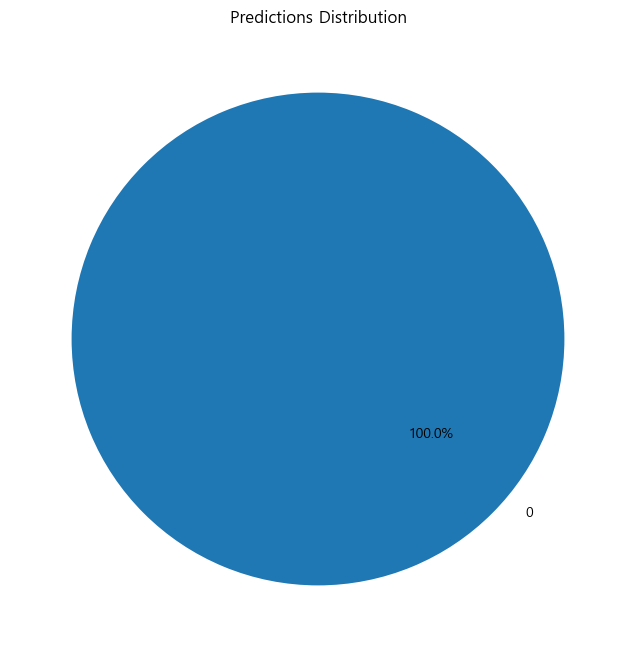

In [58]:
# 고유한 값과 그 빈도수 계산
values, counts = np.unique(predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=values, autopct='%1.1f%%', startangle=140)
plt.title('Predictions Distribution')
plt.show()

# 로지스틱 회귀는 모두 침수 위험 없음으로 예측

In [ ]:
# SVM 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# SVM 모델 생성 및 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 모델 평가
predictions = svm_model.predict(test)
# 고유한 값과 그 빈도수 계산
values, counts = np.unique(predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=values, autopct='%1.1f%%', startangle=140)
plt.title('Predictions Distribution')
plt.show()

# SVM 모델 모두 침수 위험 없음으로 예측

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# 모델 평가
dt_predictions = dt_model.predict(test)

# Decision Tree 시각화
dot_data = export_graphviz(dt_model, filled=True, rounded=True, class_names=["0", "1"],
                           feature_names=X_train.columns, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

'decision_tree.pdf'

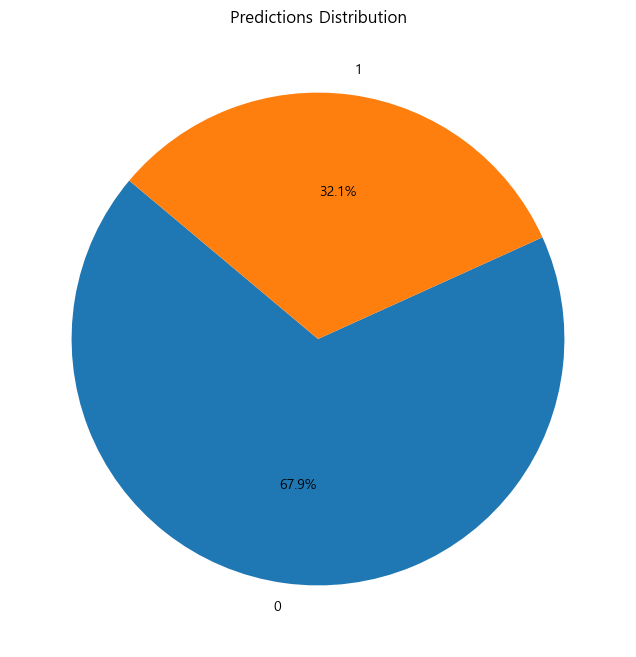

In [66]:
# 고유한 값과 그 빈도수 계산
values, counts = np.unique(dt_predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=values, autopct='%1.1f%%', startangle=140)
plt.title('Predictions Distribution')
plt.show()

In [71]:
train['연도'] = pd.to_numeric(train['연도'])
test['연도'] = pd.to_numeric(test['연도'])

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 60183, number of negative: 85523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 145706, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413044 -> initscore=-0.351395
[LightGBM] [Info] Start training from score -0.351395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

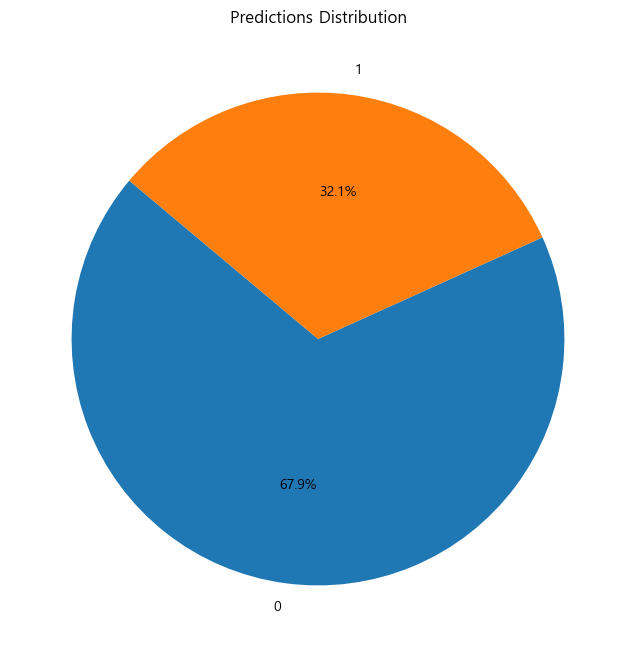

In [82]:
import lightgbm as lgb


X_train = train.drop('침수여부', axis=1)
y_train = train['침수여부']

# LightGBM 모델 생성 및 학습
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# 모델 평가
lgb_predictions = lgb_model.predict(test)

# 모델 평가
lgb_predictions = lgb_model.predict(test)
# 고유한 값과 그 빈도수 계산
values_lgb, counts_lgb = np.unique(lgb_predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts_lgb, labels=values_lgb, autopct='%1.1f%%',startangle=140)
plt.title('Predictions Distribution')
plt.show()

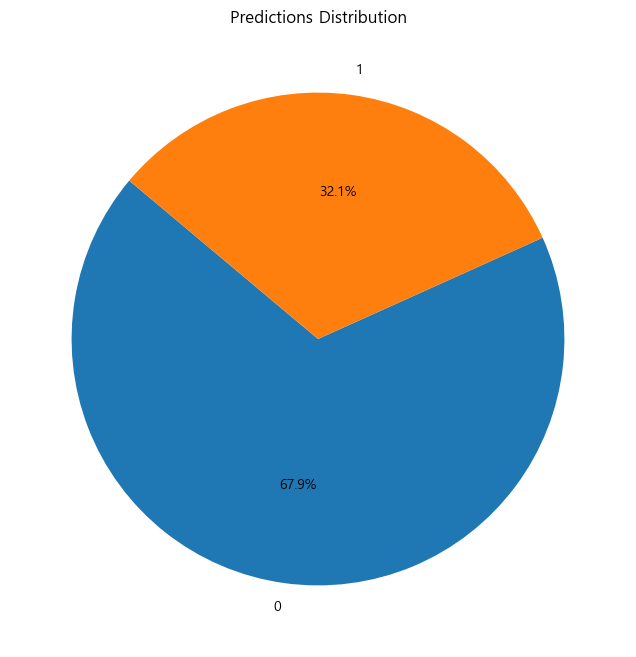

In [80]:
import xgboost as xgb

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 모델 평가
xgb_predictions = xgb_model.predict(test)


# 고유한 값과 그 빈도수 계산
values_xgb, counts_xgb = np.unique(xgb_predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts_xgb, labels=values_xgb, autopct='%1.1f%%', startangle=140)
plt.title('Predictions Distribution')
plt.show()

In [108]:
train

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도,침수여부
0,1,0,0,0,0,1,92.86,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,1
1,2,0,0,0,0,1,81.42,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,1
2,3,0,0,0,0,2,92.86,20.0,0,20181204,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018,0
3,4,0,0,0,0,2,108.43,20.0,0,20171025,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,0
4,5,0,0,0,0,1,89.98,10.0,0,20171025,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145701,911,0,0,0,0,2,89.26,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,0
145702,912,0,0,0,0,1,59.21,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,1
145703,913,0,0,0,0,1,30.05,20.0,0,20190605,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019,1
145704,914,0,0,0,0,1,4.30,10.0,0,20171121,...,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017,1


In [109]:
X_train

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 7월),월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도
0,1,0,0,0,0,1,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018
1,2,0,0,0,0,1,81.42,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018
2,3,0,0,0,0,2,92.86,20.0,0,20181204,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2018
3,4,0,0,0,0,2,108.43,20.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017
4,5,0,0,0,0,1,89.98,10.0,0,20171025,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145701,911,0,0,0,0,2,89.26,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019
145702,912,0,0,0,0,1,59.21,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019
145703,913,0,0,0,0,1,30.05,20.0,0,20190605,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2019
145704,914,0,0,0,0,1,4.30,10.0,0,20171121,...,17.193548,9.451613,3.733333,4.630824,12.194624,10.126165,67.666667,199,79.333333,2017


In [110]:
y_train

0         1
1         1
2         0
3         0
4         1
         ..
145701    0
145702    1
145703    1
145704    1
145705    1
Name: 침수여부, Length: 145706, dtype: int32

In [111]:
test

,순번,대지위치,대지구분코드,구조코드명,주용도코드명,층번호,면적(㎡),층구분코드,층구분코드명,생성일자,...,월평균강우량(2023년 8월),월평균강우량(2023년 9월),2021년 연평균강우량,2022년 연평균강우량,2023년 연평균강우량,2021년 연최대강우량,2022년 연최대강우량,2023년 연최대강우량,연도,침수여부
0,1,0,0.0,0,0,4.0,1086.50,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
1,2,0,0.0,0,0,1.0,2335.93,10.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
2,3,0,0.0,0,0,9.0,1209.55,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
3,4,0,0.0,0,0,1.0,1343.11,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
4,5,0,0.0,0,0,2.0,1087.76,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,0,1.0,0,0,1.0,18.00,20.0,0,20200220,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2020,0
34913,34914,0,1.0,0,0,1.0,18.00,20.0,0,20200220,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2020,0
34914,34915,0,0.0,0,0,2.0,110.36,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0
34915,34916,0,0.0,0,0,3.0,115.16,20.0,0,20090320,...,9.4,3.8,4.1,9.8,9.2,66,123,89,2009,0


In [115]:
# 하이퍼 파라미터 튜닝 - RandomSearchCV 사용

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score  # 또는 적절한 평가 지표 사용

X_train = train.drop('침수여부', axis=1)
y_train = train['침수여부']

label_flooding(test)
test_hyper = test.drop('침수여부', axis=1)
test_label = test['침수여부']

# RandomizedSearchCV를 위한 하이퍼파라미터 범위 정의
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=25, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters: ", random_search.best_params_)

# 튜닝된 모델로 테스트 데이터셋에 대한 예측 수행
predictions = random_search.predict(test_hyper)

# 평가 (여기서는 정확도를 사용; 필요에 따라 다른 메트릭스 사용 가능)
accuracy = accuracy_score(test_label, predictions)  # test_labels는 테스트 데이터의 실제 레이블
print("Accuracy: ", accuracy)


C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Best Parameters:  {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.4}
Accuracy:  0.678351519317238


C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


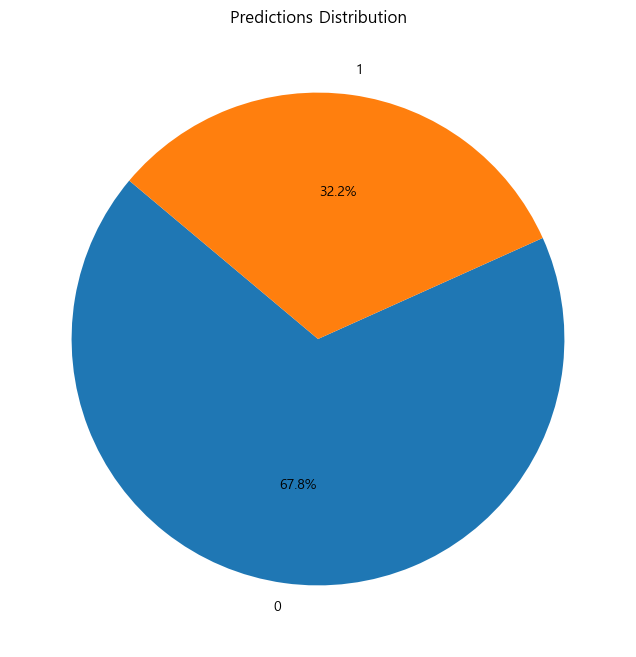

In [116]:
# 고유한 값과 그 빈도수 계산
values_hyper, counts_hyper = np.unique(predictions, return_counts=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts_hyper, labels=values_hyper, autopct='%1.1f%%', startangle=140)
plt.title('Predictions Distribution')
plt.show()

# 모델링 - 선형 회귀, 다중회귀, 랜덤 포레스트 

- 목표: 미래 강수량을 알 수 있을까??

In [84]:
print(train.columns)
print(test.columns)

Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '침수여부', '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도'],
      dtype='object')
Index(['순번', '대지위치', '대지구분코드', '구조코드명', '주용도코드명', '층번호', '면적(㎡)', '층구분코드',
       '층구분코드명', '생성일자', '월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
       '월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
       '월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)', '월평균강우량(2023년 8월)',
       '월평균강우량(2023년 9월)', '2021년 연평균강우량', '2022년 연평균강우량', '2023년 연평균강우량',
       '2021년 연최대강우량', '2022년 연최대강우량', '2023년 연최대강우량', '연도'],
      dtype='object')


In [85]:
# train 과 test의 수치만 가져와서 회귀모델
# 평균 강우량 예측 

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 가정: train은 pandas 데이터프레임으로 존재하며, 강우량 관련 컬럼이 포함되어 있음
columns = ['월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
'월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
'월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)','2021년 연최대강우량', '2022년 연최대강우량', 
           '2023년 연최대강우량']  # 강우량 관련 모든 컬럼을 포함

target = ['월평균강우량(2023년 8월)']

# 데이터 준비
X_train = train[columns]
y_train = train[target]

# 선형 회귀 모델 구축 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)  # y_train은 예측하고자 하는 타겟 변수

# 랜덤 포레스트 모델 구축 및 훈련
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


# test 
y_pred_lr_mean = lr.predict(test[columns])
y_pred_rf_mean = rf.predict(test[columns])

y_pred_lr,y_pred_rf
# 7.37 , 9.45 

# 실제값 
9.2 

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

(array([[7.3698695],
        [7.3698695],
        [7.3698695],
        ...,
        [7.3698695],
        [7.3698695],
        [7.3698695]]),
 array([9.4516129, 9.4516129, 9.4516129, ..., 9.4516129, 9.4516129,
        9.4516129]))

In [89]:
# 최대 강우량 예측 

# 가정: train은 pandas 데이터프레임으로 존재하며, 강우량 관련 컬럼이 포함되어 있음
columns = ['월평균강우량(2021년 7월)', '월평균강우량(2021년 8월)',
'월평균강우량(2021년 9월)', '월평균강우량(2022년 7월)', '월평균강우량(2022년 8월)',
'월평균강우량(2022년 9월)', '월평균강우량(2023년 7월)',
'월평균강우량(2023년 8월)','2021년 연최대강우량', '2022년 연최대강우량']  # 강우량 관련 모든 컬럼을 포함

target = ['2023년 연최대강우량']

# 데이터 준비
X_train = train[columns]
y_train = train[target]

# 선형 회귀 모델 구축 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)  # y_train은 예측하고자 하는 타겟 변수

# 랜덤 포레스트 모델 구축 및 훈련
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


# test 
y_pred_lr_max = lr.predict(test[columns])
y_pred_rf_max = rf.predict(test[columns])

y_pred_lr_max, y_pred_rf_max
# 예측값 79.33

# 실제값 89mm

C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aosdb\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

(array([[79.33333333],
        [79.33333333],
        [79.33333333],
        ...,
        [79.33333333],
        [79.33333333],
        [79.33333333]]),
 array([79.33333333, 79.33333333, 79.33333333, ..., 79.33333333,
        79.33333333, 79.33333333]))